## Team Zero Budget

#### Part -1

Aanal Patel	C0910376

Jayachandhran Saravanan	C0910392

Danilo Diaz	C0889539

Ernie Sumoso	C0881591

Yogita Sharma c0913011



<a id="0"></a> 
## After the data extraction is done, then please find out the following:
1.	[A list of  the top-10 videos based on the total views](#1)
2.	[A list of the bottom-10 videos based on the total views](#2)
3.	[The most liked video](#3)
4.	[The least liked video](#4)
5.	[The video with the highest duration](#5)
6.	[Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies](#6)

Other:
ex_1:
ex_2:


## importing important libraries and packages 


##### more credits to the in-class activity and the google developers documentation provided about youtube API, https://developers.google.com/youtube/v3/docs

In [10]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from googleapiclient.errors import HttpError

## this is the build module having all the config settings 

In [ ]:
#using GCP youtube v3 API services


api_key='' # the API keys are removed to avoid security issues

channel_id='UCn4rEMqKtwBQ6-oEwbd4PcA' ## this is demo testing to check my API credentials are working or not

youtube= build('youtube','v3',developerKey=api_key) #build engine

## Fetching 

#### all the youtube video IDs from the CSV file using the pandas

1. we recieved error messages on the fetching the contents in youtube - exceeding the limit for the day
2. so, we used the split approach by dividing the whole id list into two halves and making the request for consecutive days
3. Stored the resutls as csv and later concadiated the dataframes

In [ ]:
df_csv = pd.read_csv('links_1.csv')

In [ ]:
#created a list of youtube ids for easy access

In [ ]:
video_list = df_csv['youtubeId'].astype(str).tolist()

### Video_list has all the ids 

In [ ]:
# checking the number of video IDs

In [ ]:
len(video_list)

### Function to get the 100 comments from the video ID


In [ ]:


def task_45(video_id=None):
    
    """
    :func task_45 : functions to fetch top 100 comments irrespetive of order and their user IDs based on the video_id
    :args video_id : input for this function, which will be passed as string
    :returns : list of dict, containing the comments
    :raises: errors on youtube API request
    """
    #creating an empty list 
    lst=[]

    #using try and exception for the fetching the comments of the particular ID
    try:
        vid = video_id
        video_responses = youtube.commentThreads().list(part='snippet, replies',videoId=vid, maxResults=100).execute() # part is very important, we used snippet for first key value and the replies for the inherited key values

        #note: we removed the replies part,as it takes more time and processing power
        
        count = 0 #counter for reference on the cross checking the comment count

        #comment retrival loop and created a dict to gather all the comments
        for item in video_responses['items']:
            
            totl={} 
            count +=1
            totl['comment'] = item['snippet']['topLevelComment']['snippet']['textDisplay']     
            totl['user_id']=item['snippet']['topLevelComment']['snippet']['authorChannelId']['value']
            lst.append(totl)
            
    except HttpError as e:
        print('there is error jai here')
        raise e  
    
    return lst

     

## basic_video function is used to get the main parameters

In [58]:
def basic_video(youtube,video_id):
    
    """
    :func : use the api_key to fetch details of youtube video using GCP API service and resources
    :args youtube : build resource parameter, having personal API key and requesting service name
    : args video_id: list of video ids given --> array of strings.
    :return dict: details of the video in different d_format.
    """
    
    # print(len(video_id)/2)
    lst=[] #empty list
    
    for i in range(0,len(video_id),50): #youtube allows only 50 videos per request so passing in multiples of 50 increaments
        
        print(f"now going through of {i}/len(vidvideo_id)") #this is used as visual reference on the whole process
        
        request = youtube.videos().list(part='snippet,statistics,contentDetails',id=','.join(video_id[i:i+50])) #used join methoed during demo and felt it can be used for all the cases 
        response=request.execute() # the response is having all the details in JSON format

        #loop of each video details 
        for i in response['items']: #items is main key value of the JSON
            print(f"now_id:{i['id']}") #tracker of which is ID is last used to make the API call
            
            details=dict() #creating a empty dict for stroing the values 
            details['title']=i['snippet']['title']
            details['desc']=i['snippet']['description']
            details['Date']=i['snippet']['publishedAt']

            #while running initally, some errors are raised due to comment disabled situation
            try:
                details['comments'] = task_45(video_id= i['id'])
            except HttpError as e:
                if e.resp.status== 403: #this is repetative error raised
                    print(f"Comments disabled{i['id']}. Skip it for now...")
                    details['comments'] = []
                else:
                    print(f"Error {i['id']}: {e}")
                    details['comments'] = []
                    
            #there was an error in accessing the contentDetails tag, so the check is created for durtaion and other count values 
            
            if 'contentDetails' in i:
                details['duration']=i['contentDetails']['duration']
            else:
                details['duration']=np.nan
                
            #null value check
            check=['viewCount','likeCount','commentCount','favoriteCount']
            for j in check:
                if j in i['statistics']:
                    details[j]=i['statistics'][j]
                else:
                    details[j]=np.nan
                    
            #final append
            lst.append(details)
            
    return lst
    
    

In [ ]:
### Total number of ids are verified and tallied with the CSV sheet

In [ ]:
# temp=video_list[:49] ## i tried to test only for first 50 entries 

In [ ]:

# 11750

In [ ]:
# 11750

In [ ]:
# 

In [ ]:
# 12811*2

## calling function

#### for me it tooks 20 to 30 mins (based on my internet connections)

In [ ]:
data_=basic_video(youtube,video_list)

## creating a pandas data frame

In [ ]:
sample_pd=pd.DataFrame(data_) #converting it to the pandas dataframe

In [ ]:
sample_pd

## start running the cells from here

In [11]:

df1 = pd.read_csv('scrapper_files/support_repo/first_table.csv')
df2 = pd.read_csv('scrapper_files/support_repo/last_table_sec_day_limt.csv')

# Concatenate 
merged_df = pd.concat([df1, df2], ignore_index=True)

sample_pd=merged_df.copy()

## sompe data cleansing steps and format conversion

In [12]:
#data conversion for date and number values 
sample_pd['Date']=pd.to_datetime(sample_pd['Date']).dt.date
sample_pd['viewCount']=pd.to_numeric(sample_pd['viewCount'])
sample_pd['likeCount']=pd.to_numeric(sample_pd['likeCount'])
sample_pd['commentCount']=pd.to_numeric(sample_pd['commentCount'])
sample_pd['favoriteCount']=pd.to_numeric(sample_pd['favoriteCount'])

In [13]:
sample_pd

Unnamed: 0                                        title  \
0               0     Toy Story (1995) Trailer 2 (VHS Capture)   
1               1                         Jumanji Trailer 1995   
2               2                   Grumpier Old Men - Trailer   
3               3                            Waiting To Exhale   
4               4                       Heat Trailer HD (1995)   
...           ...                                          ...   
18020        8431                –û —á–µ–º –≥–æ–≤–æ—Ä—è—Ç –º—É–∂—á–∏–Ω—ã-–¢—Ä–µ–π–ª–µ—Ä   
18021        8432                   Three Quarter Moon Trailer   
18022        8433                               Brother Bear 2   
18023        8434      Forklift Driver Klaus English Subtitles   
18024        8435  INNOCENCE (2014) - Official Movie Trailer 1   

                                                    desc        Date  \
0      Trailer for Toy Story (1995) captured from the...  2015-05-26   
1      Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2      The more things change, the more they stay the...  2010-10-26   
3      Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4      Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                  ...         ...   
18020  –û—Ç —Å–æ–∑–¥–∞—Ç–µ–ª–µ–π —Ñ–∏–ª—å–º–æ–≤ "–î–µ–Ω—å –≤—ã–±–æ—Ä–æ–≤" –∏ "–î–µ–Ω—å —Ä...  2010-01-15   
18021                                                     2012-06-11   
18022  Kenai takes an exciting adventure he never dre...  2012-01-04   
18023    Crazy German video about forklift driver safety  2010-06-12   
18024  A young woman discovers her elite Manhattan pr...  2013-09-13   

                                                comments duration  viewCount  \
0                                      comments_disabled  PT1M31S   118106.0   
1                                      comments_disabled  PT2M48S   199055.0   
2      [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                      comments_disabled  PT2M40S   437779.0   
4      [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   
...                                                  ...      ...        ...   
18020  [{'comment': '–ü–µ—Å–Ω—è –ë–∏-2, &quot;–†–µ–∫–∏ –ª—é–±–≤–∏&quo...  PT2M30S   513404.0   
18021                                                 []  PT2M15S     1996.0   
18022                                  comments_disabled  PT1M26S  1809800.0   
18023  [{'comment': 'Too bad training videos can&#39;...  PT9M20S  2578896.0   
18024  [{'comment': 'this film fascinates me I have n...  PT2M33S  9409449.0   

       likeCount  commentCount  favoriteCount  
0          151.0           0.0              0  
1          286.0           NaN              0  
2          221.0          13.0              0  
3            NaN           NaN              0  
4         8245.0         681.0              0  
...          ...           ...            ...  
18020      380.0          28.0              0  
18021        6.0           0.0              0  
18022        NaN           NaN              0  
18023    32150.0        1643.0              0  
18024    23037.0        1012.0              0  

[18025 rows x 10 columns]

In [14]:
#saving the df into csv for future use

In [15]:
# sample_pd.to_csv('first_table.csv')

## merging the tables into one

In [16]:
df1.shape

(9589, 10)

In [17]:
df2.shape

(8436, 10)

In [18]:
merged_df.shape

(18025, 10)

In [19]:
sample_pd

Unnamed: 0                                        title  \
0               0     Toy Story (1995) Trailer 2 (VHS Capture)   
1               1                         Jumanji Trailer 1995   
2               2                   Grumpier Old Men - Trailer   
3               3                            Waiting To Exhale   
4               4                       Heat Trailer HD (1995)   
...           ...                                          ...   
18020        8431                –û —á–µ–º –≥–æ–≤–æ—Ä—è—Ç –º—É–∂—á–∏–Ω—ã-–¢—Ä–µ–π–ª–µ—Ä   
18021        8432                   Three Quarter Moon Trailer   
18022        8433                               Brother Bear 2   
18023        8434      Forklift Driver Klaus English Subtitles   
18024        8435  INNOCENCE (2014) - Official Movie Trailer 1   

                                                    desc        Date  \
0      Trailer for Toy Story (1995) captured from the...  2015-05-26   
1      Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2      The more things change, the more they stay the...  2010-10-26   
3      Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4      Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                  ...         ...   
18020  –û—Ç —Å–æ–∑–¥–∞—Ç–µ–ª–µ–π —Ñ–∏–ª—å–º–æ–≤ "–î–µ–Ω—å –≤—ã–±–æ—Ä–æ–≤" –∏ "–î–µ–Ω—å —Ä...  2010-01-15   
18021                                                     2012-06-11   
18022  Kenai takes an exciting adventure he never dre...  2012-01-04   
18023    Crazy German video about forklift driver safety  2010-06-12   
18024  A young woman discovers her elite Manhattan pr...  2013-09-13   

                                                comments duration  viewCount  \
0                                      comments_disabled  PT1M31S   118106.0   
1                                      comments_disabled  PT2M48S   199055.0   
2      [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                      comments_disabled  PT2M40S   437779.0   
4      [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   
...                                                  ...      ...        ...   
18020  [{'comment': '–ü–µ—Å–Ω—è –ë–∏-2, &quot;–†–µ–∫–∏ –ª—é–±–≤–∏&quo...  PT2M30S   513404.0   
18021                                                 []  PT2M15S     1996.0   
18022                                  comments_disabled  PT1M26S  1809800.0   
18023  [{'comment': 'Too bad training videos can&#39;...  PT9M20S  2578896.0   
18024  [{'comment': 'this film fascinates me I have n...  PT2M33S  9409449.0   

       likeCount  commentCount  favoriteCount  
0          151.0           0.0              0  
1          286.0           NaN              0  
2          221.0          13.0              0  
3            NaN           NaN              0  
4         8245.0         681.0              0  
...          ...           ...            ...  
18020      380.0          28.0              0  
18021        6.0           0.0              0  
18022        NaN           NaN              0  
18023    32150.0        1643.0              0  
18024    23037.0        1012.0              0  

[18025 rows x 10 columns]

In [20]:
merged_df.head()

Unnamed: 0                                     title  \
0           0  Toy Story (1995) Trailer 2 (VHS Capture)   
1           1                      Jumanji Trailer 1995   
2           2                Grumpier Old Men - Trailer   
3           3                         Waiting To Exhale   
4           4                    Heat Trailer HD (1995)   

                                                desc        Date  \
0  Trailer for Toy Story (1995) captured from the...  2015-05-26   
1  Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2  The more things change, the more they stay the...  2010-10-26   
3  Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4  Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   

                                            comments duration  viewCount  \
0                                  comments_disabled  PT1M31S   118106.0   
1                                  comments_disabled  PT2M48S   199055.0   
2  [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                  comments_disabled  PT2M40S   437779.0   
4  [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   

   likeCount  commentCount  favoriteCount  
0      151.0           0.0              0  
1      286.0           NaN              0  
2      221.0          13.0              0  
3        NaN           NaN              0  
4     8245.0         681.0              0

## getting the time parameters using the regex paramter

In [21]:
import re
def get_time(duration):

    """
    :func : to get the time from the text day present in the data
    :args duration : the time in text PTHMS format
    :return int: different measurement of time from the duration parameter
    """
    #Regex using groups
    pattern = r"P(?:(\d+)D)?T(?:(\d+)H)?(?:(\d+)M)?(?:(\d+)S)?" #creating groups on each time paramters based on PR and M and S strings
    matches = re.match(pattern, duration) #applying regex match method
    
    if matches: 
        days = int(matches.group(1)) if matches.group(1) else 0
        hours = int(matches.group(2)) if matches.group(2) else 0
        minutes = int(matches.group(3)) if matches.group(3) else 0
        seconds = int(matches.group(4)) if matches.group(4) else 0
        return pd.Timedelta(days=days,hours=hours, minutes=minutes, seconds=seconds)

    else:
        raise ValueError(f"Invalid duration format: {duration}")
    
sample_pd['time_cleaned'] = sample_pd['duration'].apply(get_time)


# Extract duration days,hrs,mins and secs wise
sample_pd['Days'] = sample_pd['time_cleaned'].dt.components.days
sample_pd['Hours'] = sample_pd['time_cleaned'].dt.components.hours
sample_pd['Minutes'] = sample_pd['time_cleaned'].dt.components.minutes
sample_pd['Seconds'] = sample_pd['time_cleaned'].dt.components.seconds

sample_pd['total_n_seconds'] = sample_pd['time_cleaned'].dt.total_seconds()



In [22]:
# merged_df.to_csv('merged_df.csv')

## testing the sorting method once

In [23]:
top10_views=sample_pd.sort_values(by='viewCount',ascending=False).head(10) #top 10 sortings 

#need to change this to function ## important ##

In [24]:
top10_views

Unnamed: 0                                              title  \
15594        6005           John Legend - All of Me (Official Video)   
16987        7398     Fresh Guacamole by PES | Oscar Nominated Short   
17417        7828     Beastie Boys - Sabotage (Official Music Video)   
3968         3968  Unfaithful (2002) - The Other Woman Scene (1/3...   
14419        4830     Britney Spears - Ooh La La (From The Smurfs 2)   
16165        6576                     ILO ILO Áà∏Â™Ω‰∏çÂú®ÂÆ∂ Official Trailer   
10592        1003                                     Growth Trailer   
11983        2394  Transformers 3 Dark of the Moon Teaser Trailer...   
17905        8316                      Disney's Frozen Fever Trailer   
15711        6122  The Fault In Our Stars | Official Trailer [HD]...   

                                                    desc        Date  \
15594  Official music video for ‚ÄúAll of Me‚Äù by John L...  2013-10-02   
16987  The 2013 Academy Award Nominated film by PES. ...  2013-03-07   
17417  Official music video for ‚ÄúSabotage.‚Äù REMASTERE...  2009-06-22   
3968   Unfaithful movie clips: http://j.mp/1ixkUnl\nB...  2015-10-13   
14419  Britney Spears' official music video for 'Ooh ...  2013-07-11   
16165  Trailer for ILO ILO Áà∏Â™Ω‰∏çÂú®ÂÆ∂\n\nOfficial Website:...  2013-04-23   
10592  Here is the trailer for Growth, the latest fil...  2009-09-17   
11983  Subscribe! http://YouTube.com/ClevverTV\n\nWat...  2010-12-10   
17905  On March 13, it's the perfect day for a new Fr...  2015-02-25   
15711  The Fault In Our Stars | Official Trailer: Haz...  2014-01-29   

                                                comments duration  \
15594  [{'comment': 'Ê•µÂ∞ëÊï∏Èªë‰∫∫Ë£°(ÁæéÂúã) ‰∏çÊòØÁ©øËÄ≥Ê¥ûÂ±ÅÂ≠© ÂôÅÁàõÁ®Æ<br>Á∞°Áõ¥ÊòØÊ•µÂìÅ'...   PT5M8S   
16987  [{'comment': 'Just discovered this art. If coo...  PT1M41S   
17417  [{'comment': 'You have immunity Catherine.... ...   PT3M4S   
3968   [{'comment': 'What did she see in that loser?'...  PT2M43S   
14419  [{'comment': 'me nencanta esta cancion una vez...  PT4M21S   
16165                                  comments_disabled  PT1M49S   
10592  [{'comment': 'is it like Slither?', 'user_id':...   PT2M6S   
11983  [{'comment': 'Fun fact: Sentinel&#39;s facial ...  PT2M28S   
17905                                  comments_disabled    PT40S   
15711  [{'comment': 'Honestly I haven&#39;t watched t...  PT2M30S   

          viewCount   likeCount  commentCount  favoriteCount    time_cleaned  \
15594  2.418630e+09  13320784.0      258818.0              0 0 days 00:05:08   
16987  4.800381e+08   2922334.0       74179.0              0 0 days 00:01:41   
17417  1.334254e+08    850551.0       32233.0              0 0 days 00:03:04   
3968   1.277029e+08     72461.0        3959.0              0 0 days 00:02:43   
14419  1.250566e+08    811610.0       59213.0              0 0 days 00:04:21   
16165  9.166847e+07     80376.0           NaN              0 0 days 00:01:49   
10592  7.317965e+07     35949.0          29.0              0 0 days 00:02:06   
11983  5.311235e+07    108271.0       22157.0              0 0 days 00:02:28   
17905  5.126004e+07    107991.0           0.0              0 0 days 00:00:40   
15711  4.877254e+07    609669.0       39897.0              0 0 days 00:02:30   

       Days  Hours  Minutes  Seconds  total_n_seconds  
15594     0      0        5        8            308.0  
16987     0      0        1       41            101.0  
17417     0      0        3        4            184.0  
3968      0      0        2       43            163.0  
14419     0      0        4       21            261.0  
16165     0      0        1       49            109.0  
10592     0      0        2        6            126.0  
11983     0      0        2       28            148.0  
17905     0      0        0       40             40.0  
15711     0      0        2       30            150.0

In [25]:
## Top 10 comments

## creating a function module to get sorting both in ascending and descending order

In [105]:
def max_min_stat(df,column,flag):
    temp=df.sort_values(by=column,ascending=flag)[['title',column]].head(10)
    ax1= sns.barplot(x=column,y='title', data=temp)
    plt.show()
    return temp

#repeat ---> modify it to single func

## day wise plot - extra method 

In [32]:
sample_pd['day']=pd.to_datetime(sample_pd['Date']).dt.strftime('%d') #unique plot for day-wise counts

In [33]:
sample_pd

Unnamed: 0                                        title  \
0               0     Toy Story (1995) Trailer 2 (VHS Capture)   
1               1                         Jumanji Trailer 1995   
2               2                   Grumpier Old Men - Trailer   
3               3                            Waiting To Exhale   
4               4                       Heat Trailer HD (1995)   
...           ...                                          ...   
18020        8431                –û —á–µ–º –≥–æ–≤–æ—Ä—è—Ç –º—É–∂—á–∏–Ω—ã-–¢—Ä–µ–π–ª–µ—Ä   
18021        8432                   Three Quarter Moon Trailer   
18022        8433                               Brother Bear 2   
18023        8434      Forklift Driver Klaus English Subtitles   
18024        8435  INNOCENCE (2014) - Official Movie Trailer 1   

                                                    desc        Date  \
0      Trailer for Toy Story (1995) captured from the...  2015-05-26   
1      Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2      The more things change, the more they stay the...  2010-10-26   
3      Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4      Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   
...                                                  ...         ...   
18020  –û—Ç —Å–æ–∑–¥–∞—Ç–µ–ª–µ–π —Ñ–∏–ª—å–º–æ–≤ "–î–µ–Ω—å –≤—ã–±–æ—Ä–æ–≤" –∏ "–î–µ–Ω—å —Ä...  2010-01-15   
18021                                                     2012-06-11   
18022  Kenai takes an exciting adventure he never dre...  2012-01-04   
18023    Crazy German video about forklift driver safety  2010-06-12   
18024  A young woman discovers her elite Manhattan pr...  2013-09-13   

                                                comments duration  viewCount  \
0                                      comments_disabled  PT1M31S   118106.0   
1                                      comments_disabled  PT2M48S   199055.0   
2      [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                      comments_disabled  PT2M40S   437779.0   
4      [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   
...                                                  ...      ...        ...   
18020  [{'comment': '–ü–µ—Å–Ω—è –ë–∏-2, &quot;–†–µ–∫–∏ –ª—é–±–≤–∏&quo...  PT2M30S   513404.0   
18021                                                 []  PT2M15S     1996.0   
18022                                  comments_disabled  PT1M26S  1809800.0   
18023  [{'comment': 'Too bad training videos can&#39;...  PT9M20S  2578896.0   
18024  [{'comment': 'this film fascinates me I have n...  PT2M33S  9409449.0   

       likeCount  commentCount  favoriteCount    time_cleaned  Days  Hours  \
0          151.0           0.0              0 0 days 00:01:31     0      0   
1          286.0           NaN              0 0 days 00:02:48     0      0   
2          221.0          13.0              0 0 days 00:01:52     0      0   
3            NaN           NaN              0 0 days 00:02:40     0      0   
4         8245.0         681.0              0 0 days 00:02:28     0      0   
...          ...           ...            ...             ...   ...    ...   
18020      380.0          28.0              0 0 days 00:02:30     0      0   
18021        6.0           0.0              0 0 days 00:02:15     0      0   
18022        NaN           NaN              0 0 days 00:01:26     0      0   
18023    32150.0        1643.0              0 0 days 00:09:20     0      0   
18024    23037.0        1012.0              0 0 days 00:02:33     0      0   

       Minutes  Seconds  total_n_seconds day  
0            1       31             91.0  26  
1            2       48            168.0  09  
2            1       52            112.0  26  
3            2       40            160.0  23  
4            2       28            148.0  29  
...        ...      ...              ...  ..  
18020        2       30            150.0  1

In [34]:
sample_pd_date=sample_pd.groupby('day').size() #sorting 

In [35]:
sample_pd_date

day
01    538
02    552
03    621
04    597
05    711
06    568
07    585
08    627
09    608
10    728
11    644
12    542
13    610
14    571
15    622
16    610
17    568
18    587
19    604
20    612
21    590
22    600
23    600
24    526
25    524
26    543
27    552
28    586
29    563
30    526
31    310
dtype: int64

In [36]:
sample_pd_date=sample_pd.groupby('day',as_index=False).size()

In [37]:
sample_pd_date

day  size
0   01   538
1   02   552
2   03   621
3   04   597
4   05   711
5   06   568
6   07   585
7   08   627
8   09   608
9   10   728
10  11   644
11  12   542
12  13   610
13  14   571
14  15   622
15  16   610
16  17   568
17  18   587
18  19   604
19  20   612
20  21   590
21  22   600
22  23   600
23  24   526
24  25   524
25  26   543
26  27   552
27  28   586
28  29   563
29  30   526
30  31   310

In [38]:
sort_order=["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", 
 "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", 
 "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31"]


In [39]:
sample_pd_date.index=pd.CategoricalIndex(sample_pd_date['day'],categories=sort_order,ordered=True)

In [40]:
sample_pd_date

day  size
day          
NaN  01   538
NaN  02   552
NaN  03   621
NaN  04   597
NaN  05   711
NaN  06   568
NaN  07   585
NaN  08   627
NaN  09   608
10   10   728
11   11   644
12   12   542
13   13   610
14   14   571
15   15   622
16   16   610
17   17   568
18   18   587
19   19   604
20   20   612
21   21   590
22   22   600
23   23   600
24   24   526
25   25   524
26   26   543
27   27   552
28   28   586
29   29   563
30   30   526
31   31   310

In [41]:
sample_pd_date=sample_pd_date.sort_index()

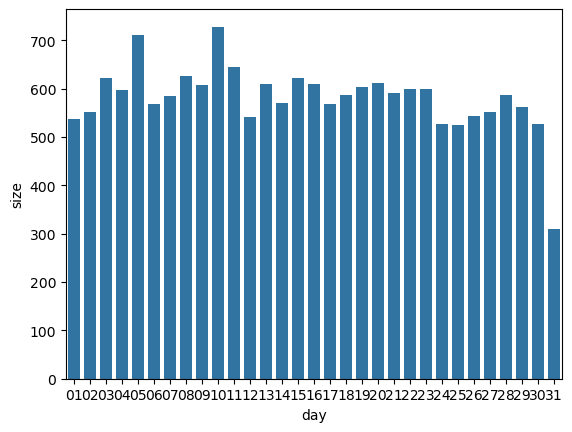

In [42]:
ax2= sns.barplot(x='day',y='size', data=sample_pd_date)
plt.show()

In [43]:
## assignment 1

1.	~100 comments~
2.	~Description of the video~
3.	~View Count~
4.	~Like Count~
5.	~Dislike Count~
6.	~Comment Count~
7.	~Duration of the video~
8.	~Favorite Count~

8/8 completed


After the data extraction is done, then please find out the following:

1.	A list of  the top-10 videos based on the total views - p
2.	A list of the bottom-10 videos based on the total views
3.	The most liked video
4.	The least liked video
5.	The video with the highest duration
6.	Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies


## Stat analysis

In [44]:
sample_pd.describe()

Unnamed: 0     viewCount     likeCount   commentCount  favoriteCount  \
count  18025.000000  1.784200e+04  1.666300e+04   16703.000000        18025.0   
mean    4524.188405  8.038851e+05  3.284868e+03     255.785188            0.0   
std     2633.435746  1.868633e+07  1.068404e+05    2571.711882            0.0   
min        0.000000  1.700000e+01  0.000000e+00       0.000000            0.0   
25%     2253.000000  2.567150e+04  6.700000e+01       5.000000            0.0   
50%     4506.000000  8.952400e+04  2.130000e+02      22.000000            0.0   
75%     6759.000000  3.348542e+05  7.880000e+02      89.000000            0.0   
max     9588.000000  2.418630e+09  1.332078e+07  258818.000000            0.0   

                    time_cleaned          Days         Hours       Minutes  \
count                      18025  18025.000000  18025.000000  18025.000000   
mean   0 days 00:06:40.005769764      0.000166      0.044216      3.291761   
std    0 days 00:38:43.026484331      0.022345      0.243167      7.122566   
min              0 days 00:00:01      0.000000      0.000000      0.000000   
25%              0 days 00:01:40      0.000000      0.000000      1.000000   
50%              0 days 00:02:09      0.000000      0.000000      2.000000   
75%              0 days 00:02:38      0.000000      0.000000      2.000000   
max              3 days 02:40:22      3.000000     12.000000     59.000000   

            Seconds  total_n_seconds  
count  18025.000000     18025.000000  
mean      28.941137       400.005770  
std       16.987150      2323.026484  
min        0.000000         1.000000  
25%       15.000000       100.000000  
50%       29.000000       129.000000  
75%       43.000000       158.000000  
max       59.000000    268822.000000

<a id="1"></a> 
## 1.Top 10 Views

/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29240 (\N{CJK UNIFIED IDEOGRAPH-7238}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23229 (\N{CJK UNIFIED IDEOGRAPH-5ABD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23478

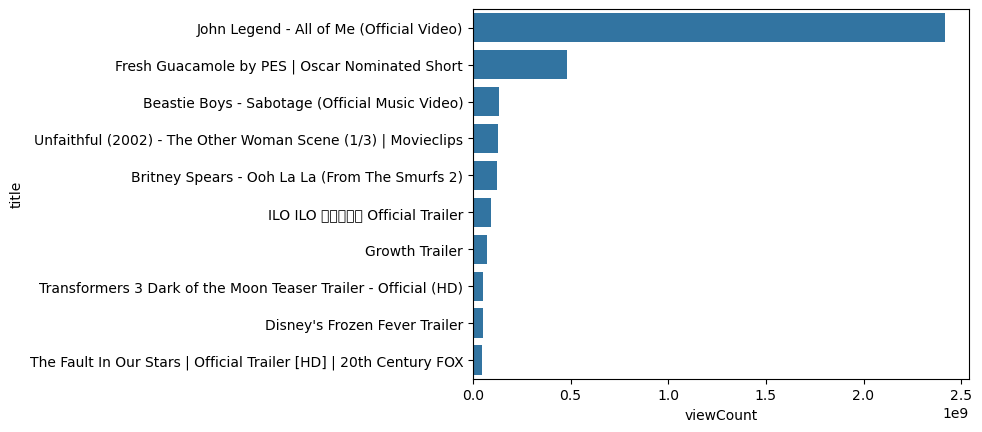

title     viewCount
15594           John Legend - All of Me (Official Video)  2.418630e+09
16987     Fresh Guacamole by PES | Oscar Nominated Short  4.800381e+08
17417     Beastie Boys - Sabotage (Official Music Video)  1.334254e+08
3968   Unfaithful (2002) - The Other Woman Scene (1/3...  1.277029e+08
14419     Britney Spears - Ooh La La (From The Smurfs 2)  1.250566e+08
16165                     ILO ILO Áà∏Â™Ω‰∏çÂú®ÂÆ∂ Official Trailer  9.166847e+07
10592                                     Growth Trailer  7.317965e+07
11983  Transformers 3 Dark of the Moon Teaser Trailer...  5.311235e+07
17905                      Disney's Frozen Fever Trailer  5.126004e+07
15711  The Fault In Our Stars | Official Trailer [HD]...  4.877254e+07

In [114]:
max_min_stat(sample_pd,'viewCount',0)

[back](#0)

<a id="2"></a> 
## 2.Bottom 10 Likes

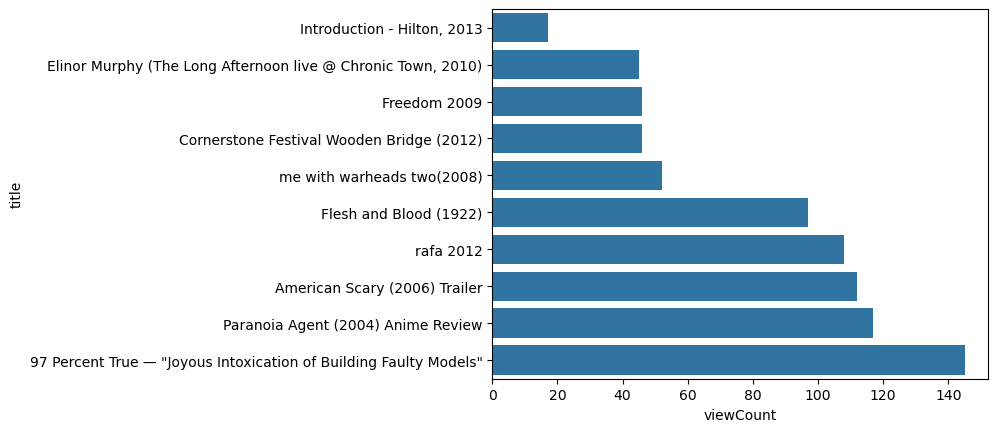

title  viewCount
14173                        Introduction - Hilton, 2013       17.0
17855  Elinor Murphy (The Long Afternoon live @ Chron...       45.0
16468                                       Freedom 2009       46.0
15011          Cornerstone Festival Wooden Bridge (2012)       46.0
15470                         me with warheads two(2008)       52.0
16901                             Flesh and Blood (1922)       97.0
14389                                          rafa 2012      108.0
15131                      American Scary (2006) Trailer      112.0
15229                 Paranoia Agent (2004) Anime Review      117.0
13505  97 Percent True ‚Äî "Joyous Intoxication of Buil...      145.0

In [115]:
max_min_stat(sample_pd,'viewCount',1)

<a id="3"></a> 
## 3.most liked video

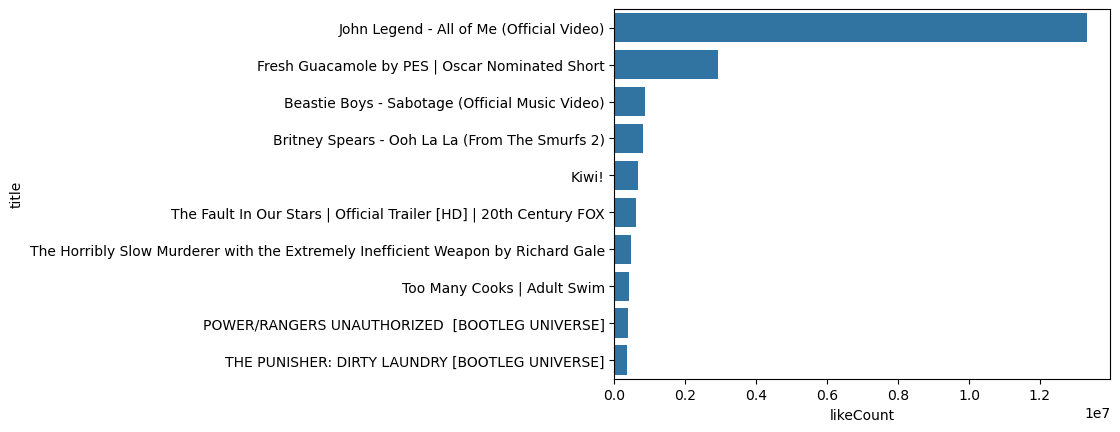

title   likeCount
15594           John Legend - All of Me (Official Video)  13320784.0
16987     Fresh Guacamole by PES | Oscar Nominated Short   2922334.0
17417     Beastie Boys - Sabotage (Official Music Video)    850551.0
14419     Britney Spears - Ooh La La (From The Smurfs 2)    811610.0
17360                                              Kiwi!    653887.0
15711  The Fault In Our Stars | Official Trailer [HD]...    609669.0
17413  The Horribly Slow Murderer with the Extremely ...    474012.0
16486                        Too Many Cooks | Adult Swim    415286.0
17963     POWER/RANGERS UNAUTHORIZED  [BOOTLEG UNIVERSE]    369971.0
16822     THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE]    346486.0

In [122]:
max_min_stat(sample_pd,'likeCount',0)

In [123]:
sample_pd.iloc[15594]

Unnamed: 0                                                       6005
title                        John Legend - All of Me (Official Video)
desc                Official music video for ‚ÄúAll of Me‚Äù by John L...
Date                                                       2013-10-02
comments            [{'comment': 'Ê•µÂ∞ëÊï∏Èªë‰∫∫Ë£°(ÁæéÂúã) ‰∏çÊòØÁ©øËÄ≥Ê¥ûÂ±ÅÂ≠© ÂôÅÁàõÁ®Æ<br>Á∞°Áõ¥ÊòØÊ•µÂìÅ'...
duration                                                       PT5M8S
viewCount                                                2418630315.0
likeCount                                                  13320784.0
commentCount                                                 258818.0
favoriteCount                                                       0
time_cleaned                                          0 days 00:05:08
Days                                                                0
Hours                                                               0
Minutes                                 

<a id="4"></a> 
## 4.least liked video

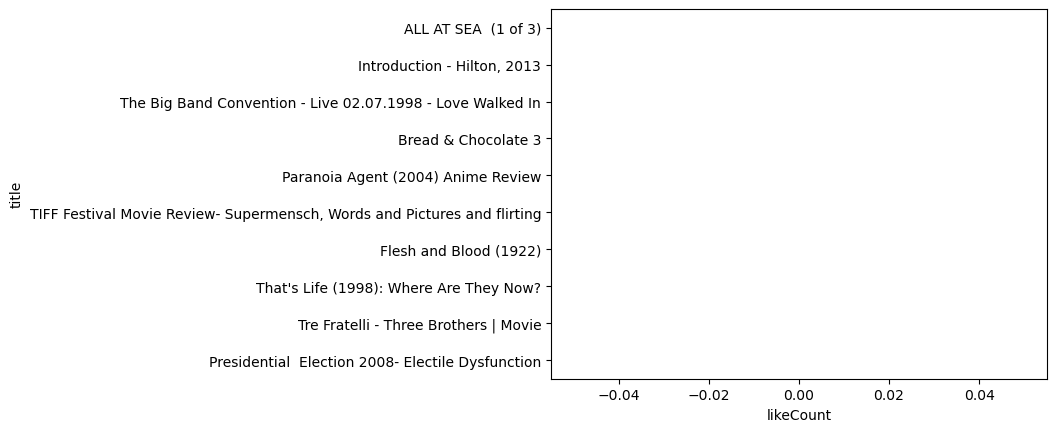

title  likeCount
6286                                ALL AT SEA  (1 of 3)        0.0
14173                        Introduction - Hilton, 2013        0.0
1359   The Big Band Convention - Live 02.07.1998 - Lo...        0.0
489                                  Bread & Chocolate 3        0.0
15229                 Paranoia Agent (2004) Anime Review        0.0
17048  TIFF Festival Movie Review- Supermensch, Words...        0.0
16901                             Flesh and Blood (1922)        0.0
17842            That's Life (1998): Where Are They Now?        0.0
12005              Tre Fratelli - Three Brothers | Movie        0.0
13637  Presidential  Election 2008- Electile Dysfunction        0.0

In [124]:
max_min_stat(sample_pd,'likeCount',1)

In [125]:
sample_pd.iloc[6286]

Unnamed: 0                                                       6286
title                                            ALL AT SEA  (1 of 3)
desc                video von Patrick Rieve. film ist teil der ins...
Date                                                       2010-12-29
comments                                                           []
duration                                                      PT9M27S
viewCount                                                       366.0
likeCount                                                         0.0
commentCount                                                      0.0
favoriteCount                                                       0
time_cleaned                                          0 days 00:09:27
Days                                                                0
Hours                                                               0
Minutes                                                             9
Seconds             

## Top 10 Views

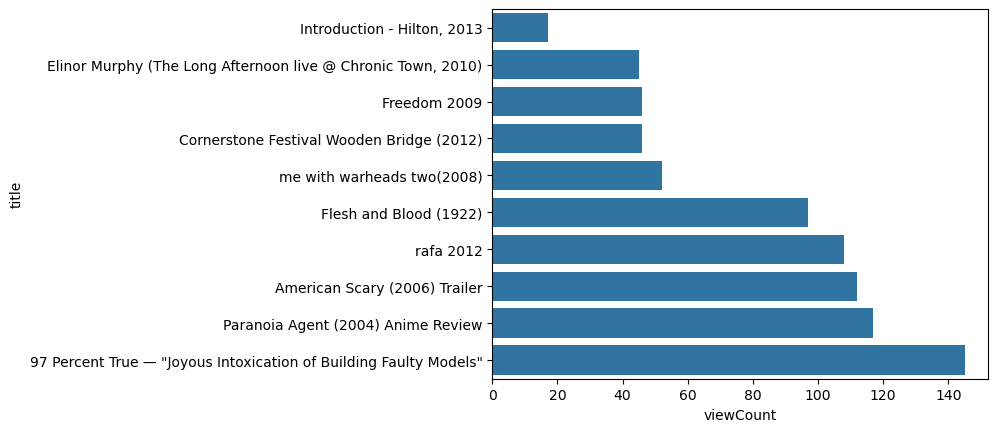

title  viewCount
14173                        Introduction - Hilton, 2013       17.0
17855  Elinor Murphy (The Long Afternoon live @ Chron...       45.0
16468                                       Freedom 2009       46.0
15011          Cornerstone Festival Wooden Bridge (2012)       46.0
15470                         me with warheads two(2008)       52.0
16901                             Flesh and Blood (1922)       97.0
14389                                          rafa 2012      108.0
15131                      American Scary (2006) Trailer      112.0
15229                 Paranoia Agent (2004) Anime Review      117.0
13505  97 Percent True ‚Äî "Joyous Intoxication of Buil...      145.0

In [118]:
max_min_stat(sample_pd,'viewCount',1)

## other plot and analysos

## bottom 10 comments

In [126]:
print(sample_pd['time_cleaned'].dtype)


timedelta64[ns]


/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29240 (\N{CJK UNIFIED IDEOGRAPH-7238}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23229 (\N{CJK UNIFIED IDEOGRAPH-5ABD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/YT-env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 23478

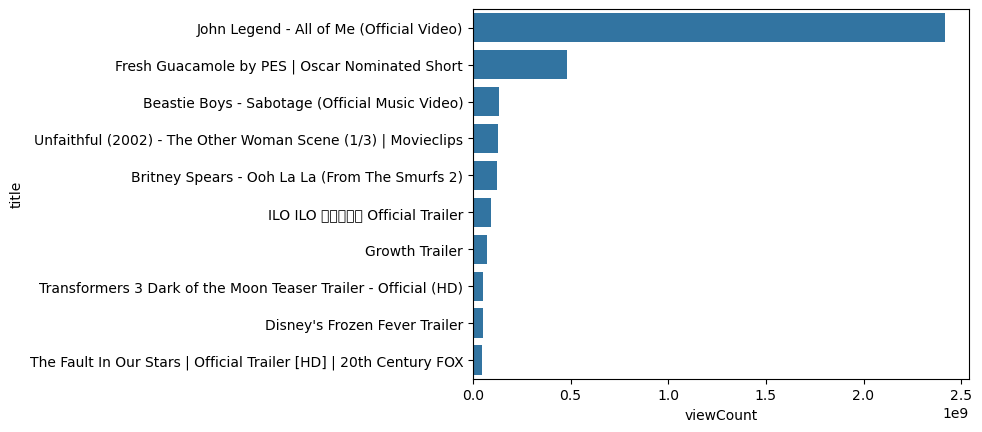

title     viewCount
15594           John Legend - All of Me (Official Video)  2.418630e+09
16987     Fresh Guacamole by PES | Oscar Nominated Short  4.800381e+08
17417     Beastie Boys - Sabotage (Official Music Video)  1.334254e+08
3968   Unfaithful (2002) - The Other Woman Scene (1/3...  1.277029e+08
14419     Britney Spears - Ooh La La (From The Smurfs 2)  1.250566e+08
16165                     ILO ILO Áà∏Â™Ω‰∏çÂú®ÂÆ∂ Official Trailer  9.166847e+07
10592                                     Growth Trailer  7.317965e+07
11983  Transformers 3 Dark of the Moon Teaser Trailer...  5.311235e+07
17905                      Disney's Frozen Fever Trailer  5.126004e+07
15711  The Fault In Our Stars | Official Trailer [HD]...  4.877254e+07

In [127]:
max_min_stat(sample_pd,'viewCount',0)

In [128]:
max_duration = sample_pd['time_cleaned'].max()
min_duration = sample_pd['time_cleaned'].min()
mean_duration = sample_pd['time_cleaned'].mean()
total_duration = sample_pd['time_cleaned'].sum()

In [129]:
max_duration

Timedelta('3 days 02:40:22')

In [130]:
min_duration

Timedelta('0 days 00:00:01')

In [131]:
mean_duration

Timedelta('0 days 00:06:40.005769764')

In [132]:
total_duration

Timedelta('83 days 10:48:24')

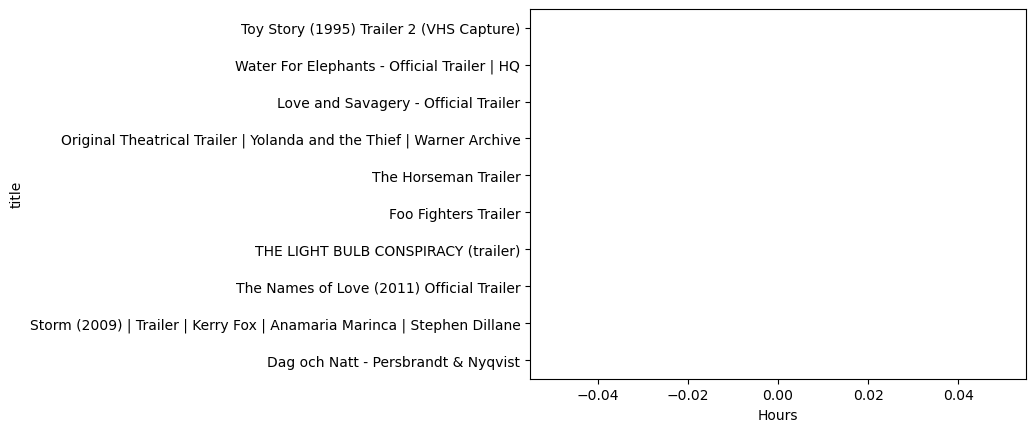

title  Hours
0               Toy Story (1995) Trailer 2 (VHS Capture)      0
11822        Water For Elephants - Official Trailer | HQ      0
11823               Love and Savagery - Official Trailer      0
11824  Original Theatrical Trailer | Yolanda and the ...      0
11825                               The Horseman Trailer      0
11826                               Foo Fighters Trailer      0
11827                THE LIGHT BULB CONSPIRACY (trailer)      0
11828          The Names of Love (2011) Official Trailer      0
11829  Storm (2009) | Trailer | Kerry Fox | Anamaria ...      0
11830                Dag och Natt - Persbrandt & Nyqvist      0

In [133]:
max_min_stat(sample_pd,'Hours',1)

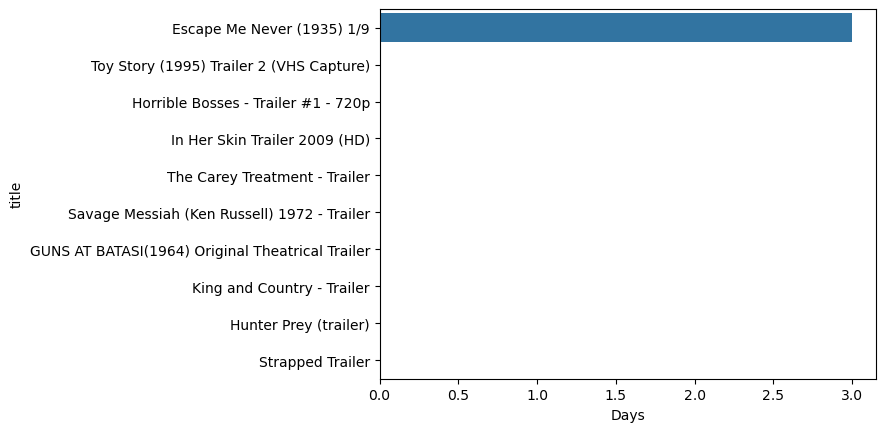

title  Days
17258                        Escape Me Never (1935) 1/9     3
0              Toy Story (1995) Trailer 2 (VHS Capture)     0
12015               Horrible Bosses - Trailer #1 - 720p     0
12021                     In Her Skin Trailer 2009 (HD)     0
12020                     The Carey Treatment - Trailer     0
12019       Savage Messiah (Ken Russell) 1972 - Trailer     0
12018  GUNS AT BATASI(1964) Original Theatrical Trailer     0
12017                        King and Country - Trailer     0
12016                             Hunter Prey (trailer)     0
12014                                  Strapped Trailer     0

In [134]:
max_min_stat(sample_pd,'Days',0)

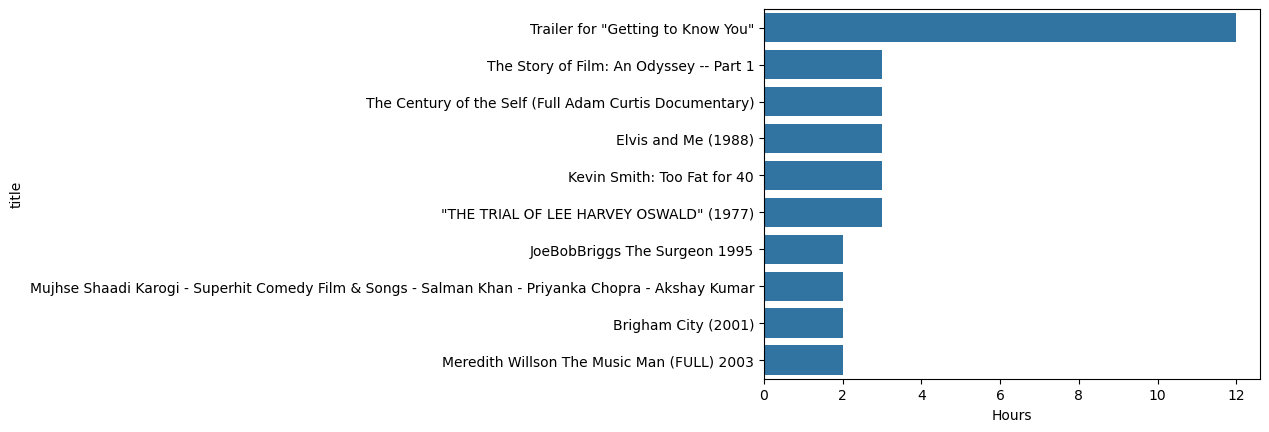

title  Hours
12536                  Trailer for "Getting to Know You"     12
17564            The Story of Film: An Odyssey -- Part 1      3
14625  The Century of the Self (Full Adam Curtis Docu...      3
17077                                Elvis and Me (1988)      3
17253                        Kevin Smith: Too Fat for 40      3
17626            "THE TRIAL OF LEE HARVEY OSWALD" (1977)      3
14331                      JoeBobBriggs The Surgeon 1995      2
11447  Mujhse Shaadi Karogi - Superhit Comedy Film & ...      2
3177                                 Brigham City (2001)      2
13786         Meredith Willson The Music Man (FULL) 2003      2

In [135]:
max_min_stat(sample_pd,'Hours',0)

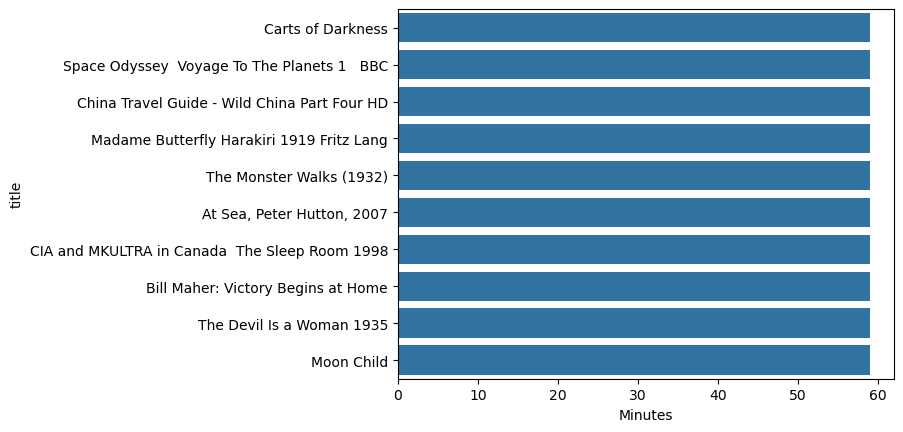

title  Minutes
17505                               Carts of Darkness       59
10016    Space Odyssey  Voyage To The Planets 1   BBC       59
10637    China Travel Guide - Wild China Part Four HD       59
11640       Madame Butterfly Harakiri 1919 Fritz Lang       59
8727                         The Monster Walks (1932)       59
12371                      At Sea, Peter Hutton, 2007       59
15207  CIA and MKULTRA in Canada  The Sleep Room 1998       59
15333              Bill Maher: Victory Begins at Home       59
9778                        The Devil Is a Woman 1935       59
6852                                       Moon Child       59

In [136]:
max_min_stat(sample_pd,'Minutes',0)

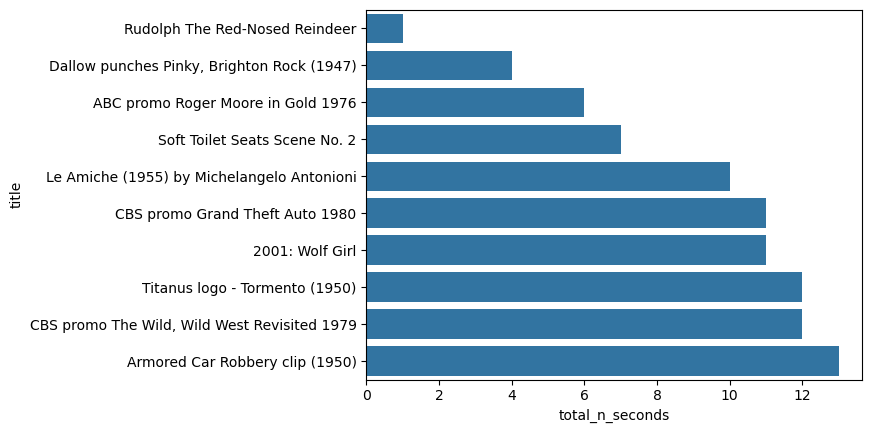

title  total_n_seconds
10405                Rudolph The Red-Nosed Reindeer              1.0
8629     Dallow punches Pinky, Brighton Rock (1947)              4.0
10719            ABC promo Roger Moore in Gold 1976              6.0
2469                  Soft Toilet Seats Scene No. 2              7.0
11235    Le Amiche (1955) by Michelangelo Antonioni             10.0
4045                CBS promo Grand Theft Auto 1980             11.0
16143                               2001: Wolf Girl             11.0
13381                Titanus logo - Tormento (1950)             12.0
13235  CBS promo The Wild, Wild West Revisited 1979             12.0
14406               Armored Car Robbery clip (1950)             13.0

In [139]:
max_min_stat(sample_pd,'total_n_seconds',1)

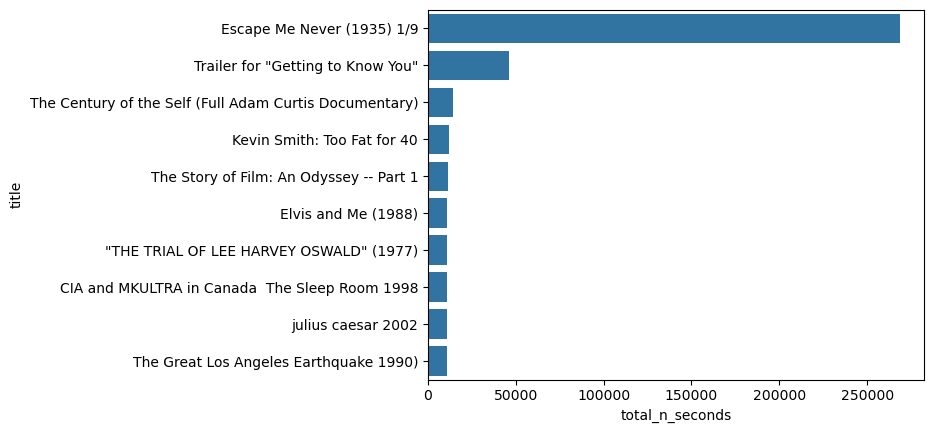

title  total_n_seconds
17258                         Escape Me Never (1935) 1/9         268822.0
12536                  Trailer for "Getting to Know You"          46164.0
14625  The Century of the Self (Full Adam Curtis Docu...          14084.0
17253                        Kevin Smith: Too Fat for 40          11969.0
17564            The Story of Film: An Odyssey -- Part 1          11466.0
17077                                Elvis and Me (1988)          11047.0
17626            "THE TRIAL OF LEE HARVEY OSWALD" (1977)          11003.0
15207     CIA and MKULTRA in Canada  The Sleep Room 1998          10740.0
15884                                 julius caesar 2002          10658.0
17732             The Great Los Angeles Earthquake 1990)          10654.0

In [140]:
max_min_stat(sample_pd,'total_n_seconds',0)

<a id="5"></a> 
## 5. highest duration

In [141]:
sample_pd.iloc[17258]

Unnamed: 0                                                       7669
title                                      Escape Me Never (1935) 1/9
desc                Elisabeth Bergner received an Academy Award no...
Date                                                       2011-09-10
comments            [{'comment': 'Please posting in legends portug...
duration                                                 P3DT2H40M22S
viewCount                                                     10938.0
likeCount                                                        20.0
commentCount                                                      8.0
favoriteCount                                                       0
time_cleaned                                          3 days 02:40:22
Days                                                                3
Hours                                                               2
Minutes                                                            40
Seconds             

1.	~A list of  the top-10 videos based on the total views~
2.	~A list of the bottom-10 videos based on the total views~
3.	~The most liked video~
4.	~The least liked video~
5.	~The video with the highest duration~
6.	~Apply sentiment analysis on the downloaded comments for each of the videos. For sentiment analysis, you can use VADER or any other tool of your choice. Your program should list the sentiments score for each of the movies~


6/6

In [63]:
sample_pd.head()

Unnamed: 0                                     title  \
0           0  Toy Story (1995) Trailer 2 (VHS Capture)   
1           1                      Jumanji Trailer 1995   
2           2                Grumpier Old Men - Trailer   
3           3                         Waiting To Exhale   
4           4                    Heat Trailer HD (1995)   

                                                desc        Date  \
0  Trailer for Toy Story (1995) captured from the...  2015-05-26   
1  Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2  The more things change, the more they stay the...  2010-10-26   
3  Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4  Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   

                                            comments duration  viewCount  \
0                                  comments_disabled  PT1M31S   118106.0   
1                                  comments_disabled  PT2M48S   199055.0   
2  [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                  comments_disabled  PT2M40S   437779.0   
4  [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   

   likeCount  commentCount  favoriteCount    time_cleaned  Days  Hours  \
0      151.0           0.0              0 0 days 00:01:31     0      0   
1      286.0           NaN              0 0 days 00:02:48     0      0   
2      221.0          13.0              0 0 days 00:01:52     0      0   
3        NaN           NaN              0 0 days 00:02:40     0      0   
4     8245.0         681.0              0 0 days 00:02:28     0      0   

   Minutes  Seconds  total_n_seconds day  
0        1       31             91.0  26  
1        2       48            168.0  09  
2        1       52            112.0  26  
3        2       40            160.0  23  
4        2       28            148.0  29

## getting comments from the dict where we scrapped the comments

In [64]:
#this function will helps in getting all the comments for pre-processing step 
import ast #using abstract syntax tree method on retriving the objcts present here
def extract_func(dic):
    try:
        temp1 = ast.literal_eval(dic) if isinstance(dic, str) and dic.startswith('[') else dic
        if isinstance(temp1, list): 
            return [comm.get('comment') for comm in temp1 if isinstance(comm, dict) and 'comment' in comm]      
    except (ValueError, SyntaxError):  
        print("issue agin")
        pass
    return None 




In [65]:
sample_pd['extracted_values'] = sample_pd['comments'].apply(extract_func)


In [66]:
sample_pd.head()

Unnamed: 0                                     title  \
0           0  Toy Story (1995) Trailer 2 (VHS Capture)   
1           1                      Jumanji Trailer 1995   
2           2                Grumpier Old Men - Trailer   
3           3                         Waiting To Exhale   
4           4                    Heat Trailer HD (1995)   

                                                desc        Date  \
0  Trailer for Toy Story (1995) captured from the...  2015-05-26   
1  Jumanji Trailer 1995\nDirector: Joe Johnston\n...  2014-11-09   
2  The more things change, the more they stay the...  2010-10-26   
3  Whitney Houston and Angela Bassett star in thi...  2013-02-23   
4  Director: Michael Mann.\nCast: Al Pacino, Robe...  2012-12-29   

                                            comments duration  viewCount  \
0                                  comments_disabled  PT1M31S   118106.0   
1                                  comments_disabled  PT2M48S   199055.0   
2  [{'comment': 'Buena pel√≠cula de comedia rom√°nt...  PT1M52S   224358.0   
3                                  comments_disabled  PT2M40S   437779.0   
4  [{'comment': 'The scene in which the lady with...  PT2M28S  1507169.0   

   likeCount  commentCount  favoriteCount    time_cleaned  Days  Hours  \
0      151.0           0.0              0 0 days 00:01:31     0      0   
1      286.0           NaN              0 0 days 00:02:48     0      0   
2      221.0          13.0              0 0 days 00:01:52     0      0   
3        NaN           NaN              0 0 days 00:02:40     0      0   
4     8245.0         681.0              0 0 days 00:02:28     0      0   

   Minutes  Seconds  total_n_seconds day  \
0        1       31             91.0  26   
1        2       48            168.0  09   
2        1       52            112.0  26   
3        2       40            160.0  23   
4        2       28            148.0  29   

                                    extracted_values  
0                                               None  
1                                               None  
2  [Buena pel√≠cula de comedia rom√°ntica, <a href=...  
3                                               None  
4  [The scene in which the lady with curly hair t...

## Pre-processing module for text data

In [67]:
import re
from html import unescape 


def emoji_stackoverflow(text):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE
    ) 
    ## this method is referenced from a stackover flow thread to catch exceptions
    text=emoji_pattern.sub(r'', text)
    return ''.join(char for char in text if ord(char) < 0x10000)
    # emoji_pattern = emoji.get_emoji_regexp()
    # text = re.sub(r'[^a-zA-Z0-9\s]+', '', re.sub(emoji_pattern, lambda match: match.group(0), text))
    # return text

def prep_main(text):
    if not isinstance(text, str):  
        return text
    
    # timestamp and urls in comments
    text = re.sub(r'<.*?>', '', text)
    
    #html tags
    text = unescape(text)
    
    # few more urls
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # emojis
    text = emoji_stackoverflow(text)
    
    #small case
    text = text.lower()
    
    # extra space 
    text = re.sub(r'\s+', ' ', text).strip()  
    
    return text



In [68]:
## iterating through all the comments in row

def preprocess_sec(comment_list):
    if isinstance(comment_list, list):
        return [prep_main(comment) for comment in comment_list]
    return comment_list


sample_pd['cleaned_comments'] = sample_pd['extracted_values'].apply(preprocess_sec)


## sentiment analysis

In [69]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
lemmatizer = WordNetLemmatizer()
def token_(text):
    if text is None:  # Check if the input is None
        return ""  # Return an empty string or handle as appropriate
    
    text = str(text)
    # remove the comms and other punct
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Lemmatize
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    
    # list to str
    return ' '.join(lemmatized)

sample_pd['token_text'] = sample_pd['cleaned_comments'].apply(token_)

In [70]:
from nltk.sentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)['compound'] #getting only the comp score for the asisgnment
    return scores

sample_pd['sentiment_score'] = sample_pd['token_text'].apply(get_sentiment)

<a id="6"></a> 
## 6. sentiment score

In [143]:
sample_pd[['title','sentiment_score']].head(25)

title  sentiment_score
0            Toy Story (1995) Trailer 2 (VHS Capture)           0.0000
1                                Jumanji Trailer 1995           0.0000
2                          Grumpier Old Men - Trailer           0.9052
3                                   Waiting To Exhale           0.0000
4                              Heat Trailer HD (1995)           1.0000
5                            Sabrina (1995) - Trailer           0.0000
6                                Tom and Huck trailer           0.0000
7   James Bond 007: GoldenEye - Official¬Æ Trailer ...           0.9999
8           The American President 1995 Movie Trailer           0.1779
9               Dracula: Dead and Loving It - Trailer          -0.9149
10                  NIXON Original Theatrical Trailer           0.9997
11             Casino Official Trailer #1 - (1995) HD           0.9997
12                     Ace Ventura: When Nature Calls           0.9463
13  Get Shorty Official Trailer #1 - Gene Hackman ...           0.9994
14                             Copycat (1995) trailer           0.9997
15                       Assassins Trailer HD  (1995)           0.9981
16                              Powder Re-Cut Trailer           0.9994
17               LEAVING LAS VEGAS - Trailer ( 1995 )           0.9985
18  Now and Then (1995) Official Trailer 1 - Chris...           0.9999
19                            Persuasion Trailer 1995           0.9992
20  Cit√© des enfants perdus - City of Lost Childre...           0.9871
21                        Shanghai Triad Trailer 1995           0.9913
22                            Dangerous Minds Trailer           0.9998
23         12 Monkeys Official Trailer #1 - (1995) HD           0.9995
24               Wings of Courage - Trailer | Crackle           0.0000

## score plot and movie names

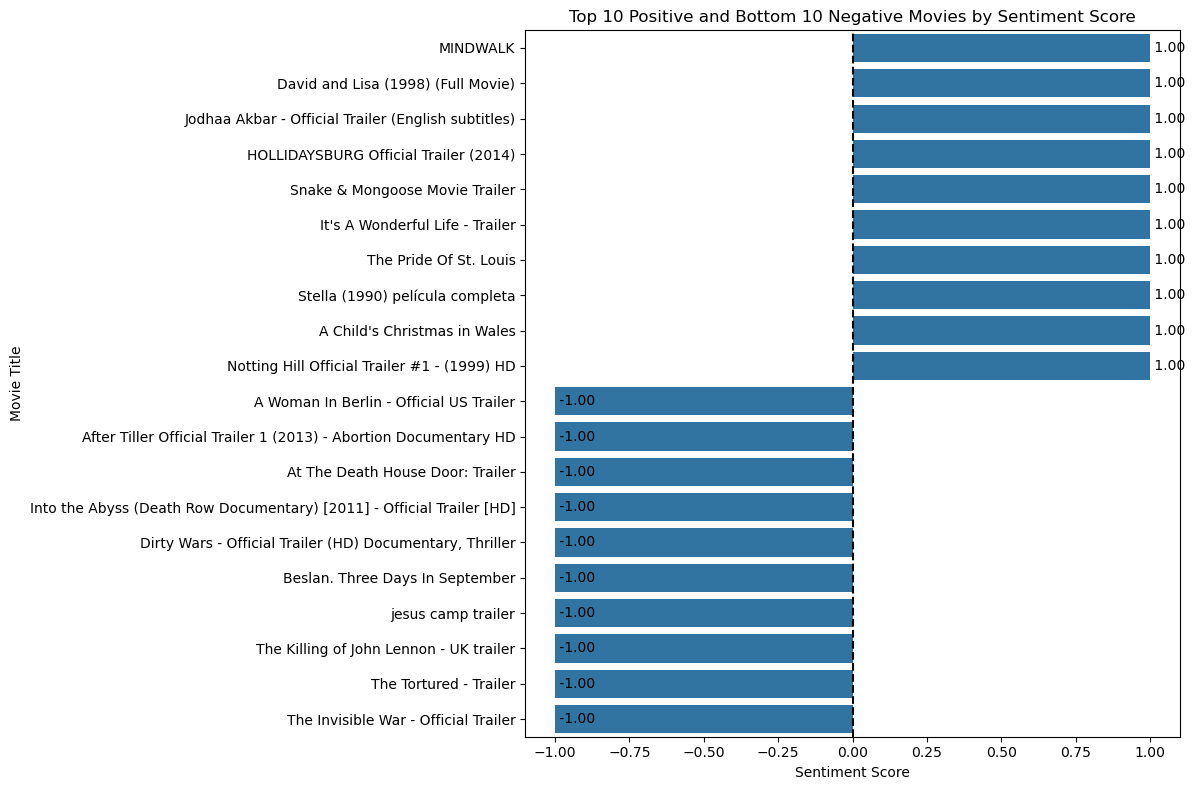

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

#sorting the movie based on the sentiment score
sorted_df = sample_pd.sort_values('sentiment_score', ascending=False)
top_10 = sorted_df.head(10)
bottom_10 = sorted_df.tail(10)

# Combine into a single DataFrame
tab_con = pd.concat([top_10, bottom_10])

plt.figure(figsize=(12, 8))
ax=sns.barplot(x='sentiment_score', y='title', data=tab_con, orient='h')

# this matplot was nice and we added here 
plt.title('Top 10 Positive and Bottom 10 Negative Movies by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')


plt.axvline(x=0, color='black', linestyle='--')
for i, v in enumerate(tab_con['sentiment_score']):
    ax.text(v, i, f' {v:.2f}', va='center')
# Show the plot
plt.tight_layout()
plt.show()

## checking the sentiment score is right or not

In [145]:
sample_pd[sample_pd['title'] == 'jesus camp trailer'].index

Index([8095], dtype='int64')

In [146]:
sample_pd.iloc[8911] 

Unnamed: 0                                                       8911
title               Jodhaa Akbar - Official Trailer (English subti...
desc                Watch the official trailer of the movie Jodhaa...
Date                                                       2010-04-12
comments            [{'comment': 'Guys, where can I watch the full...
duration                                                      PT4M10S
viewCount                                                    817301.0
likeCount                                                      1132.0
commentCount                                                    112.0
favoriteCount                                                       0
time_cleaned                                          0 days 00:04:10
Days                                                                0
Hours                                                               0
Minutes                                                             4
Seconds             

In [147]:
sample_pd.iloc[8095]

Unnamed: 0                                                       8095
title                                              jesus camp trailer
desc                here is the trailer for the movie jesus camp\r...
Date                                                       2006-08-27
comments            [{'comment': '1.dont ask questions <br>2.dont ...
duration                                                      PT2M11S
viewCount                                                    811115.0
likeCount                                                      1015.0
commentCount                                                   2595.0
favoriteCount                                                       0
time_cleaned                                          0 days 00:02:11
Days                                                                0
Hours                                                               0
Minutes                                                             2
Seconds             

In [148]:
sample_pd.iloc[8095][4]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_24858/4028245263.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[8095][4]


'[{\'comment\': \'1.dont ask questions <br>2.dont have phones(to record anything shady or call for help)<br>3.sleep deprivation <br>4.intimidation<br>5.physical exhaustion <br>6.gaslight<br><br>There is nothing more sick and evil than using the name of God for clearly evil and sadism.<br><br>Im sorry for this\', \'user_id\': \'UCyXAgLUvRqS1urj6vY1-smw\'}, {\'comment\': \'Why do adults who choose a religious lifestyle always spend a lot of time with young children? It must be a sexual thing. Sick.\', \'user_id\': \'UC5WD3fk9GxIfTzLOUs_IJDA\'}, {\'comment\': \'This trailer managed to open too many closed wounds. The look on those kids faces is all too Real, i would know, as a child my Dad would take us too those same types of church, i was only 7 so i really did believe that the end of times were coming and that i had to give my life too God or i would burn in hell. THERES MORE‚Ä¶. Then my Dad became a pastor by the time i was 12, He took it very Seriously. We had 3 services and 2 rehear

In [149]:
sample_pd.iloc[8911][4]

/var/folders/hc/ylrqcnkn0_j7q5zz18mp_r_c0000gn/T/ipykernel_24858/3380896323.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_pd.iloc[8911][4]


'[{\'comment\': \'Guys, where can I watch the full movie of this movie in HD? Please... Thank you :)\', \'user_id\': \'UCcHPZVrH5V7pGUwhFVOUwng\'}, {\'comment\': \'aishwarya ...princess...stunning\', \'user_id\': \'UCDIXuHGz6ENwOB4TDkWkY7A\'}, {\'comment\': \'Where can I download this movie guys? Please.....\', \'user_id\': \'UCR5BCanrl6YOoLBawLh9g0A\'}, {\'comment\': \'If this movie had released today with SS Rajamouli as Action director, It would have been one heck of a success!!!\', \'user_id\': \'UChI5pNmxJahmPej2VCl51pg\'}, {\'comment\': \'Hrithik aish good couple in this movie\', \'user_id\': \'UC9hR-nJzPtIa7_Uq5ZTTJPA\'}, {\'comment\': \'thats what I like about my country..we should respect each other religon...\', \'user_id\': \'UCtkSZr641dBMQBmqxFJq2Qw\'}, {\'comment\': \'can someone just tell me were can I find this movie with subs x.x I been searching for one hour already and nada  nothing\', \'user_id\': \'UCTZK5oPNOu917aEYFINoxyQ\'}, {\'comment\': \'Full movie pls\', \'use

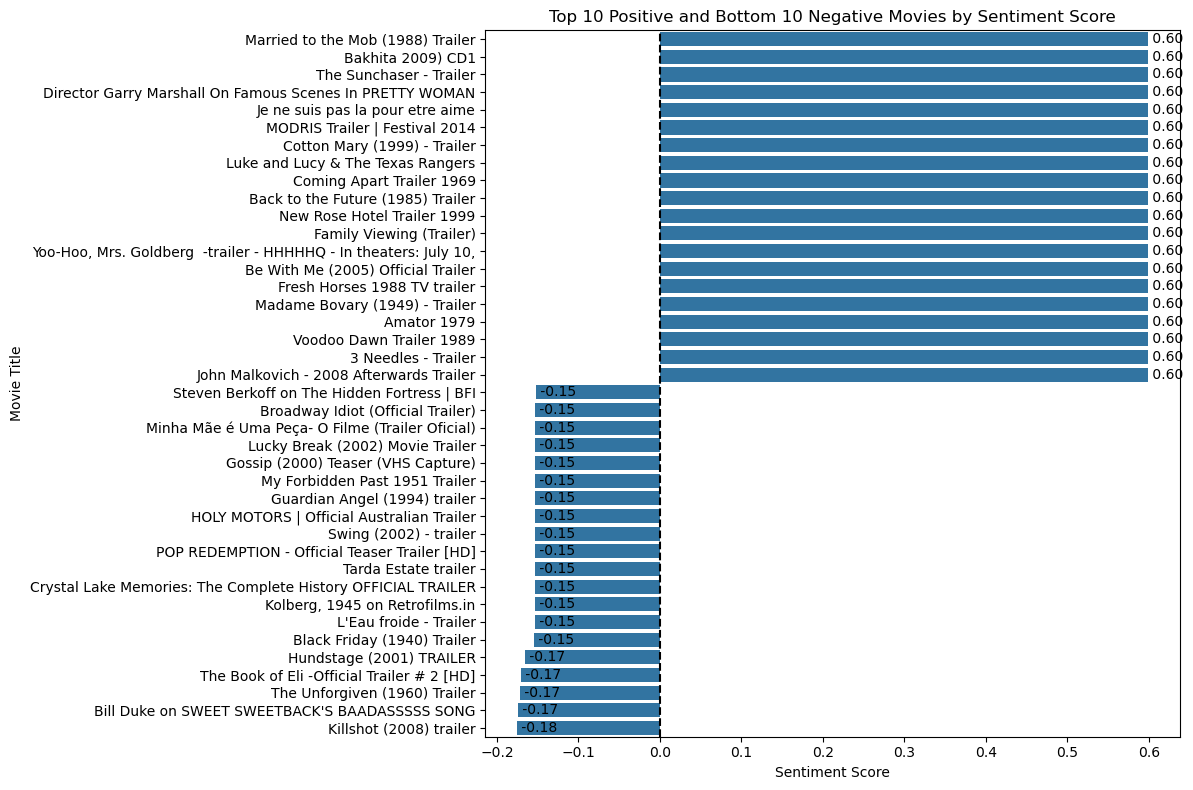

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

#sorting the movie based on the sentiment score
sorted_df = sample_pd.sort_values('sentiment_score', ascending=False)
top_10 = sorted_df[11500:11520]
bottom_10 = sorted_df[16000:16020]

# Combine into a single DataFrame
tab_con = pd.concat([top_10, bottom_10])

plt.figure(figsize=(12, 8))
ax=sns.barplot(x='sentiment_score', y='title', data=tab_con, orient='h')

# this matplot was nice and we added here 
plt.title('Top 10 Positive and Bottom 10 Negative Movies by Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Movie Title')


plt.axvline(x=0, color='black', linestyle='--')
for i, v in enumerate(tab_con['sentiment_score']):
    ax.text(v, i, f' {v:.2f}', va='center')
# Show the plot
plt.tight_layout()
plt.show()